# How does the number of people flying between different locations change over time?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar as Cal

In [2]:
# Importing the flight data
data_f = pd.read_csv(r"C:\Users\Ridhwan\Desktop\UOL\PROGRAMMING COURSEWORK\joined_df.csv")
# changing settings to display all columns
pd.set_option("display.max_columns", None)

In [3]:
data_f

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13979491,2005,12,22,4,1652.0,1655,1815.0,1837,DL,901,N109DL,263.0,282.0,241.0,-22.0,-3.0,ATL,ONT,1900,7,15,0,0,0,0,0
13979492,2005,12,22,4,1825.0,1825,1858.0,1848,DL,902,N932DL,93.0,83.0,54.0,10.0,0.0,ATL,MEM,332,7,32,0,0,0,0,0
13979493,2005,12,22,4,1507.0,1511,1641.0,1649,DL,903,N306DL,154.0,158.0,121.0,-8.0,-4.0,ATL,SAT,874,4,29,0,0,0,0,0
13979494,2005,12,22,4,924.0,925,1056.0,1111,DL,904,N981DL,152.0,166.0,129.0,-15.0,-1.0,ATL,MSP,906,4,19,0,0,0,0,0


### The question asks for the change in number of people flying between different locations overtime, we can observe the chnages in number of flights taken between locations overtime with the data provided.

In [4]:
ap_ds= pd.read_csv(r"C:\Users\Ridhwan\Desktop\UOL\PROGRAMMING COURSEWORK\Unzipped Data set\dataverse_files\airports.csv")

In [5]:
ap_ds.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [6]:
ap_ds.country.value_counts()

USA                               3372
Thailand                             1
Palau                                1
N Mariana Islands                    1
Federated States of Micronesia       1
Name: country, dtype: int64

In [7]:
# There are rows present that dont pertain to us, so we'll be removing those

In [8]:
ap_ds.drop(ap_ds[(ap_ds['country'] == 'Thailand')|(ap_ds['country'] == 'Palau')|(ap_ds['country'] == 'N Mariana Islands')|(ap_ds['country'] == 'Federated States of Micronesia')].index,inplace= True)

In [9]:
ap_ds.country.value_counts()

USA    3372
Name: country, dtype: int64

In [10]:
ap_ds.state.value_counts()

AK    263
TX    209
CA    205
OK    102
FL    100
OH    100
GA     97
NY     97
MI     94
MN     89
IL     88
WI     84
KS     78
IA     78
MO     74
AR     74
AL     73
NE     73
NC     72
MS     72
MT     71
PA     71
TN     70
IN     65
WA     65
AZ     59
OR     57
SD     57
LA     55
ND     52
SC     52
NM     51
KY     50
CO     49
VA     47
ID     37
UT     35
NJ     35
ME     34
NV     32
WY     32
MA     30
WV     24
MD     18
HI     16
CT     15
NH     14
VT     13
PR     11
RI      6
DE      5
VI      5
CQ      4
AS      3
DC      1
GU      1
Name: state, dtype: int64

In [12]:
#Checking for null values in airport csv
pd.isnull(ap_ds).sum(axis=0)

iata       0
airport    0
city       8
state      8
country    0
lat        0
long       0
dtype: int64

In [13]:
ap_ds = ap_ds[pd.notnull(ap_ds["state"])]
ap_ds

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


In [52]:
#Checking if all null values removed
pd.isnull(ap_ds).sum(axis=0)

Origin          0
Origin_State    0
dtype: int64

### We will be taking slices from our main data set since we will be doing 2 different joins for origin states and destination states

In [14]:
data_f = data_f.filter(['Year', 'Origin', 'Dest','Month'], axis = 1)
data_f

,Year,Origin,Dest,Month
0,2006,ATL,PHX,1
1,2006,ATL,PHX,1
2,2006,ATL,PHX,1
3,2006,AUS,PHX,1
4,2006,AUS,PHX,1
...,...,...,...,...
13979491,2005,ATL,ONT,12
13979492,2005,ATL,MEM,12
13979493,2005,ATL,SAT,12
13979494,2005,ATL,MSP,12


In [15]:
data_f

,Year,Origin,Dest,Month
0,2006,ATL,PHX,1
1,2006,ATL,PHX,1
2,2006,ATL,PHX,1
3,2006,AUS,PHX,1
4,2006,AUS,PHX,1
...,...,...,...,...
13979491,2005,ATL,ONT,12
13979492,2005,ATL,MEM,12
13979493,2005,ATL,SAT,12
13979494,2005,ATL,MSP,12


In [16]:
# Making a copy of airports csv to prep for destination join

In [17]:
ap_dscpy = ap_ds.iloc[:,:].copy(deep = True)
ap_dscpy

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


In [18]:
#Renaming to prepare for joins
ap_ds.rename(columns= {'iata':'Origin','state':'Origin_State'}, inplace = True)
ap_ds

,Origin,airport,city,Origin_State,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


In [19]:
#Renaming to prepare for joins
ap_dscpy.rename(columns= {'iata':'Dest','state':'Destn_state'}, inplace = True)
ap_dscpy

,Dest,airport,city,Destn_state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


In [20]:
#Taking relevant columns from csv
ap_ds = ap_ds.filter(['Origin','Origin_State'], axis = 1)
ap_ds

,Origin,Origin_State
0,00M,MS
1,00R,TX
2,00V,CO
3,01G,NY
4,01J,FL
...,...,...
3371,ZEF,NC
3372,ZER,PA
3373,ZPH,FL
3374,ZUN,NM


In [21]:
#Taking relevant columns from csv
ap_dscpy = ap_dscpy.filter(['Dest','Destn_state'], axis = 1)
ap_dscpy

,Dest,Destn_state
0,00M,MS
1,00R,TX
2,00V,CO
3,01G,NY
4,01J,FL
...,...,...
3371,ZEF,NC
3372,ZER,PA
3373,ZPH,FL
3374,ZUN,NM


In [22]:
#Merging for Origin States
data_f = pd.merge(data_f, ap_ds, on = 'Origin')
data_f

,Year,Origin,Dest,Month,Origin_State
0,2006,ATL,PHX,1,GA
1,2006,ATL,PHX,1,GA
2,2006,ATL,PHX,1,GA
3,2006,ATL,DCA,1,GA
4,2006,ATL,DCA,1,GA
...,...,...,...,...,...
13970756,2005,PIE,MDW,4,FL
13970757,2005,PIE,MDW,4,FL
13970758,2005,PIE,MDW,4,FL
13970759,2005,PIE,MDW,4,FL


In [23]:
#Merging for Destination States
data_f = pd.merge(data_f, ap_dscpy, on = 'Dest')
data_f

,Year,Origin,Dest,Month,Origin_State,Destn_state
0,2006,ATL,PHX,1,GA,AZ
1,2006,ATL,PHX,1,GA,AZ
2,2006,ATL,PHX,1,GA,AZ
3,2006,ATL,PHX,1,GA,AZ
4,2006,ATL,PHX,1,GA,AZ
...,...,...,...,...,...,...
13961983,2005,AKN,ADK,12,AK,AK
13961984,2005,AKN,ADK,12,AK,AK
13961985,2005,AKN,ADK,12,AK,AK
13961986,2005,AKN,ADK,12,AK,AK


In [24]:
data_f

,Year,Origin,Dest,Month,Origin_State,Destn_state
0,2006,ATL,PHX,1,GA,AZ
1,2006,ATL,PHX,1,GA,AZ
2,2006,ATL,PHX,1,GA,AZ
3,2006,ATL,PHX,1,GA,AZ
4,2006,ATL,PHX,1,GA,AZ
...,...,...,...,...,...,...
13961983,2005,AKN,ADK,12,AK,AK
13961984,2005,AKN,ADK,12,AK,AK
13961985,2005,AKN,ADK,12,AK,AK
13961986,2005,AKN,ADK,12,AK,AK


In [25]:
#Creating route column by attaching Origin_State string with Destn_state string with a - in the middle
data_f['Route'] = data_f['Origin_State'].str.cat(data_f['Destn_state'].values,sep=' - ')
data_f.head()

,Year,Origin,Dest,Month,Origin_State,Destn_state,Route
0,2006,ATL,PHX,1,GA,AZ,GA - AZ
1,2006,ATL,PHX,1,GA,AZ,GA - AZ
2,2006,ATL,PHX,1,GA,AZ,GA - AZ
3,2006,ATL,PHX,1,GA,AZ,GA - AZ
4,2006,ATL,PHX,1,GA,AZ,GA - AZ


In [26]:
#Seperating dataset into years 
df_5 = data_f[data_f.Year != 2006]
df_6 = data_f[data_f.Year != 2005]

In [27]:
df_5

,Year,Origin,Dest,Month,Origin_State,Destn_state,Route
3642,2005,ATL,PHX,1,GA,AZ,GA - AZ
3643,2005,ATL,PHX,1,GA,AZ,GA - AZ
3644,2005,ATL,PHX,1,GA,AZ,GA - AZ
3645,2005,ATL,PHX,1,GA,AZ,GA - AZ
3646,2005,ATL,PHX,1,GA,AZ,GA - AZ
...,...,...,...,...,...,...,...
13961983,2005,AKN,ADK,12,AK,AK,AK - AK
13961984,2005,AKN,ADK,12,AK,AK,AK - AK
13961985,2005,AKN,ADK,12,AK,AK,AK - AK
13961986,2005,AKN,ADK,12,AK,AK,AK - AK


In [28]:
df_6

,Year,Origin,Dest,Month,Origin_State,Destn_state,Route
0,2006,ATL,PHX,1,GA,AZ,GA - AZ
1,2006,ATL,PHX,1,GA,AZ,GA - AZ
2,2006,ATL,PHX,1,GA,AZ,GA - AZ
3,2006,ATL,PHX,1,GA,AZ,GA - AZ
4,2006,ATL,PHX,1,GA,AZ,GA - AZ
...,...,...,...,...,...,...,...
13961887,2006,AKN,ADK,12,AK,AK,AK - AK
13961888,2006,AKN,ADK,12,AK,AK,AK - AK
13961889,2006,AKN,ADK,12,AK,AK,AK - AK
13961890,2006,AKN,ADK,12,AK,AK,AK - AK


In [29]:
#Identifying the top 10 routes in 2005
route_5= df_5.groupby('Route')['Route'].agg(['count'])
route_5= route_5.nlargest(n=10,columns=['count']).reset_index()
route_5

,Route,count
0,CA - CA,343829
1,TX - TX,275034
2,GA - FL,67817
3,FL - GA,67799
4,NV - CA,59295
5,CA - NV,59079
6,CA - AZ,55311
7,AZ - CA,55111
8,TX - CA,52859
9,CA - TX,52570


In [30]:
#Identifying the top 10 routes in 2006
route_6= df_6.groupby('Route')['Route'].agg(['count'])
route_6= route_6.nlargest(n=10,columns=['count']).reset_index()
route_6

,Route,count
0,CA - CA,349201
1,TX - TX,267732
2,HI - HI,84450
3,AZ - CA,70836
4,CA - AZ,70642
5,CA - NV,65464
6,NV - CA,65346
7,GA - FL,64074
8,FL - GA,63717
9,TX - CA,54406


In [32]:
#Renaming columns to specific year to avoid confusion when joinging back
route_5.rename(columns= {'Route':'Route_2005','count':'count_2005'}, inplace = True)
route_6.rename(columns= {'Route':'Route_2006','count':'count_2006'}, inplace = True)

#### The top 10 flights in 2005 arent exactly the same top 9 flights in 2006, so we will be rearranging the order of the top 10 2006 routes to match the top 10 routes from 2005, since we are doing the change in number of people flying between locations from 2005 and observing the difference in the same routes in 2006.

In [34]:
route_6 = route_6.reindex([0, 1,7,8,6,5,4,3,9,2 ])

In [35]:
route_6 = route_6.reset_index()
route_6.drop(['index'], axis = 1, inplace= True)
route_6

,Route_2006,count_2006
0,CA - CA,349201
1,TX - TX,267732
2,GA - FL,64074
3,FL - GA,63717
4,NV - CA,65346
5,CA - NV,65464
6,CA - AZ,70642
7,AZ - CA,70836
8,TX - CA,54406
9,HI - HI,84450


In [36]:
#Combining the top 9 count datasets back together
route_combined = pd.concat([route_5,route_6 ], axis=1)

In [37]:
route_combined

,Route_2005,count_2005,Route_2006,count_2006
0,CA - CA,343829,CA - CA,349201
1,TX - TX,275034,TX - TX,267732
2,GA - FL,67817,GA - FL,64074
3,FL - GA,67799,FL - GA,63717
4,NV - CA,59295,NV - CA,65346
5,CA - NV,59079,CA - NV,65464
6,CA - AZ,55311,CA - AZ,70642
7,AZ - CA,55111,AZ - CA,70836
8,TX - CA,52859,TX - CA,54406
9,CA - TX,52570,HI - HI,84450


In [38]:
#Finding the difference between the number of flights via the same routes
route_combined['change'] = route_combined.apply(lambda x: x['count_2006'] - x['count_2005'], axis=1)
route_combined

,Route_2005,count_2005,Route_2006,count_2006,change
0,CA - CA,343829,CA - CA,349201,5372
1,TX - TX,275034,TX - TX,267732,-7302
2,GA - FL,67817,GA - FL,64074,-3743
3,FL - GA,67799,FL - GA,63717,-4082
4,NV - CA,59295,NV - CA,65346,6051
5,CA - NV,59079,CA - NV,65464,6385
6,CA - AZ,55311,CA - AZ,70642,15331
7,AZ - CA,55111,AZ - CA,70836,15725
8,TX - CA,52859,TX - CA,54406,1547
9,CA - TX,52570,HI - HI,84450,31880


In [41]:
#Dropping the 9th row
route_combined.drop(route_combined.index[[0,9]], axis = 0, inplace= True)
route_combined

,Route_2005,count_2005,Route_2006,count_2006,change
1,TX - TX,275034,TX - TX,267732,-7302
2,GA - FL,67817,GA - FL,64074,-3743
3,FL - GA,67799,FL - GA,63717,-4082
4,NV - CA,59295,NV - CA,65346,6051
5,CA - NV,59079,CA - NV,65464,6385
6,CA - AZ,55311,CA - AZ,70642,15331
7,AZ - CA,55111,AZ - CA,70836,15725
8,TX - CA,52859,TX - CA,54406,1547


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'TX - TX'),
  Text(1, 0, 'GA - FL'),
  Text(2, 0, 'FL - GA'),
  Text(3, 0, 'NV - CA'),
  Text(4, 0, 'CA - NV'),
  Text(5, 0, 'CA - AZ'),
  Text(6, 0, 'AZ - CA'),
  Text(7, 0, 'TX - CA')])

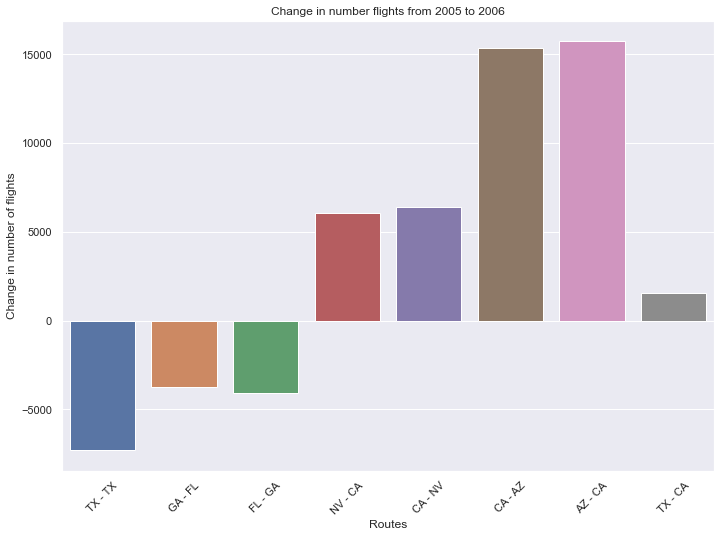

In [51]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data= route_combined , x="Route_2005",y="change").set(title="Change in number flights from 2005 to 2006", xlabel="Routes",ylabel="Change in number of flights")

plt.xticks(rotation=45)